# Constrained bending with tension #

Eq(Derivative(w(x), (x, 4)) - H*Derivative(w(x), (x, 2))/EI, 0)

C1 + C2*x + C3*exp(-x*sqrt(H/EI)) + C4*exp(x*sqrt(H/EI))

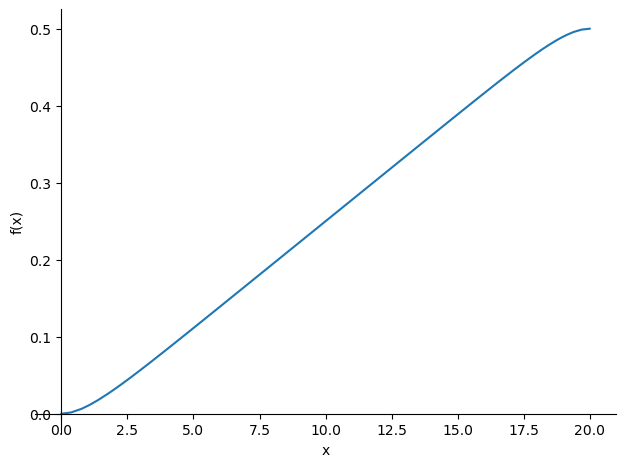

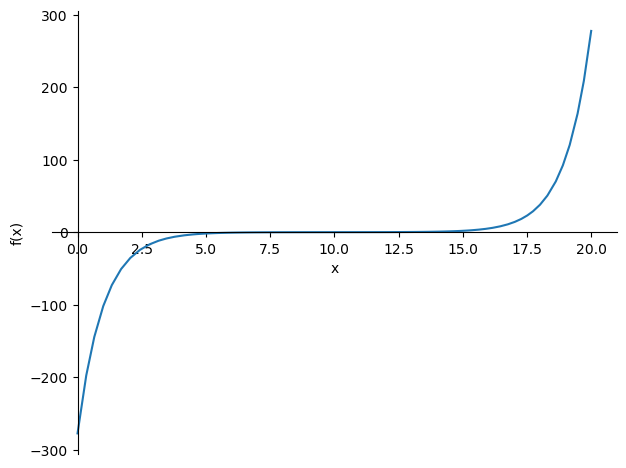

In [1]:
import sympy as sp
w, phi = sp.symbols('w phi', cls=sp.Function)
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')
x, EI, H, L, q, w0 = sp.symbols('x EI H L q w0')
alpha = sp.sqrt(H/EI)

diffeq = sp.Eq(sp.diff(w(x),x,4)-alpha**2*sp.diff(w(x),x,2),0)
display(diffeq)

w = sp.dsolve(diffeq, w(x))
w = w.rhs

display(w)

phi = sp.diff(w,x)
Va = H * sp.diff(w,x)
Mb = -EI * sp.diff(w,x,2)
Vb = sp.diff(Mb,x)

eq1  = sp.Eq(w.subs(x , 0) , 0)
eq2  = sp.Eq(phi.subs(x , 0) , 0)
eq3  = sp.Eq(w.subs(x , 2*L) , w0)
eq4  = sp.Eq(phi.subs(x , 2*L) , 0)

sol = sp.solve((eq1,eq2,eq3,eq4) ,
               (C1 ,C2 ,C3 ,C4))
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L,10),(EI,10000),(H,10000),(w0,0.5)])
sp.plot(w_subs,(x,0,20))

Mb_sol = Mb.subs(sol)
Mb_subs = Mb_sol.subs([(L,10),(EI,10000),(H,10000),(w0,0.5)])
sp.plot(Mb_subs,(x,0,20));